In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import load_processed_data as ld
import models as mdl
import keras
from definitions import PROCESSED_DATA_PATH, MODELS_PATH, FIGURE_OUTPUT_PATH
from training_history_utils import plot_training_history
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.applications import vgg16

# Create Model

In [5]:
# get model base
base = mdl.get_my_conv_layers()

# get input dimensions for classifier
input_dim = base.output_shape[1]

# get classifier
clf = mdl.get_my_NN_classifier(input_dim=input_dim,
                             n_output=3)

In [6]:
# instantiate model
model = Sequential()

# add base and classifier
model.add(base)
model.add(clf)

# compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load Data

In [7]:
# load the train data
X_train, y_train, _ = ld.load_train_data()

# load the validation data
X_val, y_val, _ = ld.load_validation_data()

In [8]:
# data generator batch size
batch_size = 30

# training data image generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.1,
                                   fill_mode='nearest')
train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=batch_size,
                                     seed=10)

# validation data image generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow(X_val,
                                 y_val,
                                 batch_size=batch_size,
                                 seed=10)

# Train the model

In [9]:
# save history
history = model.fit_generator(train_generator,
                              steps_per_epoch=np.ceil(X_train.shape[0] / batch_size),
                              epochs=100,
                              validation_data=val_generator,
                              validation_steps=np.ceil(X_val.shape[0] / batch_size),
                              verbose=1,
                              class_weight=None)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
131/131 [==============================] - 36s 273ms/step - loss: 0.9748 - acc: 0.5538 - val_loss: 1.0272 - val_acc: 0.4897
Epoch 2/4
131/131 [==============================] - 33s 252ms/step - loss: 0.8510 - acc: 0.6245 - val_loss: 0.9017 - val_acc: 0.5440
Epoch 3/4
131/131 [==============================] - 34s 261ms/step - loss: 0.8278 - acc: 0.6350 - val_loss: 0.9320 - val_acc: 0.5792
Epoch 4/4
131/131 [==============================] - 34s 261ms/step - loss: 0.7651 - acc: 0.6659 - val_loss: 0.6802 - val_acc: 0.6764


# Training history visualization

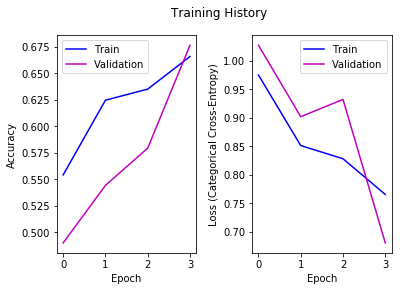

In [47]:
# get training history figure
fig = plot_training_history(history)

# save figure to image file
fig.savefig(FIGURE_OUTPUT_PATH + "training_history_model_1.png")

TypeError: can't multiply sequence by non-int of type 'float'

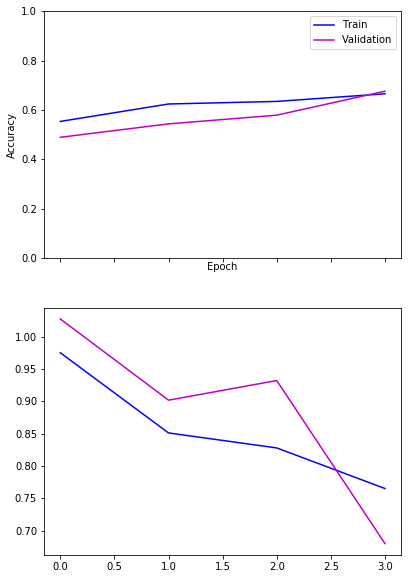

In [53]:
    # create figure with subplots
    fig, ax = plt.subplots(nrows=2,
                           ncols=1,
                           sharex=True,
                           figsize=(6.4, 10))

    # plot accuracy scores
    ax[0].plot(train_acc, 'b', label='Train')
    ax[0].plot(val_acc, 'm', label='Validation')
    ax[0].set_ylim([0, 1])
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend()

    # plot loss scores
    ax[1].plot(train_loss, 'b', label='Train')
    ax[1].plot(val_loss, 'm', label='Validation')
    ax[1].set_ylim([0, max(train_loss, val_loss)*1.05])
    ax[1].set_ylabel('Loss (Categorical Cross-Entropy)')
    ax[1].set_xlabel('Epoch')
    ax[1].legend()

    # set title for figure
    fig.suptitle('Training History')

In [55]:
max(train_loss + val_loss)

1.0271699103856688

# Save the model

In [ ]:
# save model to HDF5 file
model.save(MODELS_PATH + 'model_1.h5')